In [1]:
import cv2
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import math

Importing all the required libraries and packages

In [2]:
validationDirect,trainDirect=[p for p in pathlib.Path("C://Users//Trivikram//Machine_Learning//Data//Product").iterdir()]
trainFiles=[files for files in trainDirect.iterdir()]
validationFiles=[files for files in validationDirect.iterdir()]

Accessing the dataset of both training and validation

In [3]:
train_Data=pd.DataFrame()
for Folders in trainFiles:
    ProductNo=int(str(Folders)[-1])
    for files in Folders.iterdir():
        img=cv2.imread(str(files))
        img=cv2.resize(img, (64, 64))
        Pixels=img.ravel()
        Pixels=np.append(Pixels,ProductNo)
        train_Data=train_Data.append(pd.Series(Pixels),ignore_index=True)
validation_Data=pd.DataFrame()
for Folders in validationFiles:
    ProductNo=int(str(Folders)[-1])
    for files in Folders.iterdir():
        img=cv2.imread(str(files))
        img=cv2.resize(img, (64,64))
        Pixels=img.ravel()
        Pixels=np.append(Pixels,ProductNo)
        validation_Data=validation_Data.append(pd.Series(Pixels),ignore_index=True)

Converting the images into pixels of Red,Green and Blue and storing those Pixels in a list which is then appended to the DataFrame for both training and validation files

In [4]:
train_Data

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
0,67.0,71.0,55.0,71.0,74.0,59.0,73.0,75.0,62.0,76.0,...,128.0,124.0,109.0,130.0,128.0,110.0,125.0,123.0,106.0,1.0
1,64.0,73.0,50.0,71.0,76.0,60.0,71.0,76.0,61.0,72.0,...,128.0,126.0,108.0,127.0,127.0,109.0,125.0,126.0,106.0,1.0
2,66.0,70.0,52.0,71.0,74.0,60.0,74.0,77.0,62.0,74.0,...,129.0,125.0,111.0,130.0,128.0,111.0,128.0,124.0,109.0,1.0
3,65.0,70.0,57.0,70.0,74.0,60.0,75.0,78.0,63.0,74.0,...,128.0,126.0,108.0,128.0,126.0,110.0,127.0,124.0,110.0,1.0
4,65.0,71.0,52.0,71.0,74.0,58.0,75.0,76.0,65.0,75.0,...,128.0,125.0,110.0,130.0,127.0,112.0,128.0,125.0,110.0,1.0
5,67.0,71.0,57.0,70.0,75.0,61.0,71.0,76.0,59.0,72.0,...,128.0,126.0,108.0,128.0,127.0,109.0,125.0,125.0,107.0,1.0
6,67.0,72.0,51.0,69.0,75.0,58.0,73.0,76.0,60.0,73.0,...,129.0,126.0,109.0,130.0,129.0,112.0,125.0,126.0,110.0,1.0
7,67.0,71.0,52.0,70.0,76.0,59.0,73.0,75.0,62.0,74.0,...,130.0,125.0,110.0,129.0,127.0,109.0,128.0,125.0,111.0,1.0
8,64.0,71.0,56.0,69.0,73.0,62.0,73.0,76.0,66.0,70.0,...,125.0,125.0,109.0,128.0,127.0,113.0,125.0,126.0,110.0,1.0
9,64.0,72.0,55.0,70.0,76.0,59.0,70.0,77.0,62.0,72.0,...,127.0,127.0,111.0,127.0,128.0,112.0,125.0,125.0,110.0,1.0


In [5]:
validation_Data

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
0,67.0,71.0,58.0,72.0,73.0,63.0,74.0,76.0,64.0,75.0,...,128.0,125.0,111.0,130.0,126.0,112.0,127.0,124.0,109.0,1.0
1,65.0,71.0,54.0,71.0,74.0,62.0,73.0,75.0,61.0,75.0,...,129.0,126.0,111.0,130.0,127.0,110.0,128.0,123.0,109.0,1.0
2,67.0,71.0,52.0,72.0,77.0,57.0,72.0,77.0,57.0,75.0,...,129.0,126.0,108.0,130.0,128.0,110.0,128.0,125.0,110.0,1.0
3,64.0,71.0,57.0,69.0,74.0,65.0,71.0,75.0,66.0,72.0,...,129.0,125.0,112.0,128.0,126.0,115.0,127.0,125.0,115.0,1.0
4,66.0,69.0,57.0,72.0,75.0,62.0,73.0,77.0,66.0,74.0,...,128.0,125.0,112.0,129.0,127.0,115.0,126.0,124.0,114.0,1.0
5,64.0,71.0,57.0,69.0,75.0,64.0,71.0,77.0,65.0,72.0,...,128.0,127.0,113.0,128.0,128.0,114.0,125.0,123.0,113.0,1.0
6,69.0,72.0,54.0,73.0,77.0,65.0,73.0,74.0,64.0,75.0,...,128.0,125.0,109.0,130.0,129.0,113.0,124.0,125.0,108.0,1.0
7,66.0,71.0,56.0,70.0,74.0,61.0,73.0,76.0,65.0,74.0,...,129.0,126.0,110.0,130.0,127.0,113.0,125.0,124.0,110.0,1.0
8,67.0,72.0,50.0,71.0,75.0,56.0,73.0,76.0,55.0,73.0,...,130.0,128.0,108.0,131.0,128.0,110.0,126.0,125.0,106.0,1.0
9,64.0,71.0,50.0,68.0,75.0,58.0,70.0,78.0,61.0,71.0,...,128.0,126.0,107.0,126.0,127.0,107.0,125.0,125.0,107.0,1.0


In [11]:
Columns=train_Data.columns
scaler=StandardScaler()
X=train_Data[[col for col in Columns if col!=1288]]
X_train=pd.DataFrame(data=scaler.fit_transform(X),columns=X.columns)
X_validation=pd.DataFrame(data=scaler.transform(validation_Data[X.columns]),columns=X.columns)
y_train=train_Data[1288]
y_validation=validation_Data[1288]

Scaling down all the pixel values using Standard Scaler to decrease computing power and hence reduce time latency for the algorithms to be tested

In [7]:
AlgorithmsList=[]
AccuracyList=[]

Declaring two lists for names of algorithms in use and their accuracy achieved.

In [8]:
Bayes=GaussianNB()
Bayes.fit(X_train,y_train)
AlgorithmsList.append("NB")
accuracy=Bayes.score(X_validation,y_validation)
AccuracyList.append(accuracy)
print("The accuracy obtained from GaussianNaive Bayes is "+str(accuracy))

The accuracy obtained from GaussianNaive Bayes is 0.36875


Using our first algorithm Gaussian Naive Bayes which assumes that all of the attributes are independent of each other and all of them follow the Normal Distribution.
The accurracy obtained is 63 percent as shown when tested on our validation dataset

In [9]:
decreaseList=[]
for i in range(0,11):
    decreaseList.append(round(i*0.1,2))
print(decreaseList)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


A decrease List is made to be further used

In [24]:
param_grid = {'min_samples_split': range(2,20),'min_impurity_decrease':decreaseList,'criterion':['entropy','gini']}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid,cv = 3,verbose=10)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 396 candidates, totalling 1188 fits
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2 


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2, score=0.476, total=  12.4s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.4s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2, score=0.512, total=  13.3s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.7s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2, score=0.488, total=  12.5s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.3s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3, score=0.486, total=  12.6s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   51.0s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3, score=0.523, total=  13.4s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3, score=0.488, total=  12.5s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=4 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.3min remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=4, score=0.482, total=  12.2s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=4 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.5min remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=4, score=0.537, total=  13.3s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=4 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.7min remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=4, score=0.446, total=  12.5s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=5 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.9min remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=5, score=0.498, total=  12.4s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=5 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=5, score=0.513, total=  13.2s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=5 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=5, score=0.490, total=  12.5s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=6, score=0.491, total=  12.2s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=6, score=0.532, total=  13.1s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=6, score=0.497, total=  12.5s
[CV] criterion=entropy, min_impurity_dec

[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=3, score=0.470, total=   6.2s
[CV] criterion=entropy, min_impurity_decrease=0.1, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=3, score=0.474, total=   6.3s
[CV] criterion=entropy, min_impurity_decrease=0.1, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=3, score=0.473, total=   6.2s
[CV] criterion=entropy, min_impurity_decrease=0.1, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=4, score=0.470, total=   6.0s
[CV] criterion=entropy, min_impurity_decrease=0.1, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=4, score=0.474, total=   6.3s
[CV] criterion=entropy, min_impurity_decrease=0.1, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=4, score=0.473, total=   6.6s
[CV] criterion=entropy, min_impurity_dec

[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=19, score=0.470, total=   6.4s
[CV] criterion=entropy, min_impurity_decrease=0.1, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=19, score=0.474, total=   6.7s
[CV] criterion=entropy, min_impurity_decrease=0.1, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=19, score=0.473, total=   6.5s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=2, score=0.338, total=   5.8s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=2, score=0.344, total=   5.9s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=2, score=0.343, total=   5.8s
[CV] criterion=entropy, min_impurit

[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=17, score=0.338, total=   5.8s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=17 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=17, score=0.344, total=   6.1s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=17 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=17, score=0.343, total=   5.8s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=18, score=0.338, total=   5.5s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=18, score=0.344, total=   5.8s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=18, score=0.343, total=   5.7s
[CV] criterion=entropy, min_i

[CV]  criterion=entropy, min_impurity_decrease=0.3, min_samples_split=15, score=0.216, total=   4.7s
[CV] criterion=entropy, min_impurity_decrease=0.3, min_samples_split=15 
[CV]  criterion=entropy, min_impurity_decrease=0.3, min_samples_split=15, score=0.193, total=   4.9s
[CV] criterion=entropy, min_impurity_decrease=0.3, min_samples_split=15 
[CV]  criterion=entropy, min_impurity_decrease=0.3, min_samples_split=15, score=0.223, total=   4.8s
[CV] criterion=entropy, min_impurity_decrease=0.3, min_samples_split=16 
[CV]  criterion=entropy, min_impurity_decrease=0.3, min_samples_split=16, score=0.216, total=   4.8s
[CV] criterion=entropy, min_impurity_decrease=0.3, min_samples_split=16 
[CV]  criterion=entropy, min_impurity_decrease=0.3, min_samples_split=16, score=0.193, total=   4.9s
[CV] criterion=entropy, min_impurity_decrease=0.3, min_samples_split=16 
[CV]  criterion=entropy, min_impurity_decrease=0.3, min_samples_split=16, score=0.223, total=   4.8s
[CV] criterion=entropy, min_i

[CV]  criterion=entropy, min_impurity_decrease=0.4, min_samples_split=13, score=0.216, total=   4.8s
[CV] criterion=entropy, min_impurity_decrease=0.4, min_samples_split=13 
[CV]  criterion=entropy, min_impurity_decrease=0.4, min_samples_split=13, score=0.193, total=   4.9s
[CV] criterion=entropy, min_impurity_decrease=0.4, min_samples_split=13 
[CV]  criterion=entropy, min_impurity_decrease=0.4, min_samples_split=13, score=0.223, total=   4.8s
[CV] criterion=entropy, min_impurity_decrease=0.4, min_samples_split=14 
[CV]  criterion=entropy, min_impurity_decrease=0.4, min_samples_split=14, score=0.216, total=   4.7s
[CV] criterion=entropy, min_impurity_decrease=0.4, min_samples_split=14 
[CV]  criterion=entropy, min_impurity_decrease=0.4, min_samples_split=14, score=0.193, total=   4.8s
[CV] criterion=entropy, min_impurity_decrease=0.4, min_samples_split=14 
[CV]  criterion=entropy, min_impurity_decrease=0.4, min_samples_split=14, score=0.223, total=   4.8s
[CV] criterion=entropy, min_i

[CV]  criterion=entropy, min_impurity_decrease=0.5, min_samples_split=11, score=0.157, total=   4.0s
[CV] criterion=entropy, min_impurity_decrease=0.5, min_samples_split=11 
[CV]  criterion=entropy, min_impurity_decrease=0.5, min_samples_split=11, score=0.158, total=   4.1s
[CV] criterion=entropy, min_impurity_decrease=0.5, min_samples_split=11 
[CV]  criterion=entropy, min_impurity_decrease=0.5, min_samples_split=11, score=0.187, total=   4.0s
[CV] criterion=entropy, min_impurity_decrease=0.5, min_samples_split=12 
[CV]  criterion=entropy, min_impurity_decrease=0.5, min_samples_split=12, score=0.157, total=   3.9s
[CV] criterion=entropy, min_impurity_decrease=0.5, min_samples_split=12 
[CV]  criterion=entropy, min_impurity_decrease=0.5, min_samples_split=12, score=0.158, total=   4.0s
[CV] criterion=entropy, min_impurity_decrease=0.5, min_samples_split=12 
[CV]  criterion=entropy, min_impurity_decrease=0.5, min_samples_split=12, score=0.187, total=   4.0s
[CV] criterion=entropy, min_i

[CV]  criterion=entropy, min_impurity_decrease=0.6, min_samples_split=9, score=0.127, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.6, min_samples_split=9 
[CV]  criterion=entropy, min_impurity_decrease=0.6, min_samples_split=9, score=0.127, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.6, min_samples_split=9 
[CV]  criterion=entropy, min_impurity_decrease=0.6, min_samples_split=9, score=0.129, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.6, min_samples_split=10 
[CV]  criterion=entropy, min_impurity_decrease=0.6, min_samples_split=10, score=0.127, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.6, min_samples_split=10 
[CV]  criterion=entropy, min_impurity_decrease=0.6, min_samples_split=10, score=0.127, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.6, min_samples_split=10 
[CV]  criterion=entropy, min_impurity_decrease=0.6, min_samples_split=10, score=0.129, total=   3.4s
[CV] criterion=entropy, min_impuri

[CV]  criterion=entropy, min_impurity_decrease=0.7, min_samples_split=7, score=0.127, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.7, min_samples_split=7 
[CV]  criterion=entropy, min_impurity_decrease=0.7, min_samples_split=7, score=0.127, total=   3.6s
[CV] criterion=entropy, min_impurity_decrease=0.7, min_samples_split=7 
[CV]  criterion=entropy, min_impurity_decrease=0.7, min_samples_split=7, score=0.129, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.7, min_samples_split=8 
[CV]  criterion=entropy, min_impurity_decrease=0.7, min_samples_split=8, score=0.127, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.7, min_samples_split=8 
[CV]  criterion=entropy, min_impurity_decrease=0.7, min_samples_split=8, score=0.127, total=   3.6s
[CV] criterion=entropy, min_impurity_decrease=0.7, min_samples_split=8 
[CV]  criterion=entropy, min_impurity_decrease=0.7, min_samples_split=8, score=0.129, total=   3.4s
[CV] criterion=entropy, min_impurity_dec

[CV]  criterion=entropy, min_impurity_decrease=0.8, min_samples_split=5, score=0.127, total=   3.4s
[CV] criterion=entropy, min_impurity_decrease=0.8, min_samples_split=5 
[CV]  criterion=entropy, min_impurity_decrease=0.8, min_samples_split=5, score=0.127, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.8, min_samples_split=5 
[CV]  criterion=entropy, min_impurity_decrease=0.8, min_samples_split=5, score=0.129, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.8, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.8, min_samples_split=6, score=0.127, total=   3.4s
[CV] criterion=entropy, min_impurity_decrease=0.8, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.8, min_samples_split=6, score=0.127, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.8, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.8, min_samples_split=6, score=0.129, total=   3.5s
[CV] criterion=entropy, min_impurity_dec

[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=3, score=0.127, total=   3.4s
[CV] criterion=entropy, min_impurity_decrease=0.9, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=3, score=0.127, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.9, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=3, score=0.129, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.9, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=4, score=0.127, total=   3.4s
[CV] criterion=entropy, min_impurity_decrease=0.9, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=4, score=0.127, total=   3.7s
[CV] criterion=entropy, min_impurity_decrease=0.9, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=4, score=0.129, total=   3.5s
[CV] criterion=entropy, min_impurity_dec

[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=19, score=0.127, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.9, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=19, score=0.127, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.9, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=19, score=0.129, total=   3.4s
[CV] criterion=entropy, min_impurity_decrease=1.0, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=2, score=0.068, total=   2.2s
[CV] criterion=entropy, min_impurity_decrease=1.0, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=2, score=0.069, total=   2.2s
[CV] criterion=entropy, min_impurity_decrease=1.0, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=2, score=0.070, total=   2.1s
[CV] criterion=entropy, min_impurit

[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=17, score=0.068, total=   2.1s
[CV] criterion=entropy, min_impurity_decrease=1.0, min_samples_split=17 
[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=17, score=0.069, total=   2.1s
[CV] criterion=entropy, min_impurity_decrease=1.0, min_samples_split=17 
[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=17, score=0.070, total=   2.1s
[CV] criterion=entropy, min_impurity_decrease=1.0, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=18, score=0.068, total=   2.1s
[CV] criterion=entropy, min_impurity_decrease=1.0, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=18, score=0.069, total=   2.2s
[CV] criterion=entropy, min_impurity_decrease=1.0, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=18, score=0.070, total=   2.2s
[CV] criterion=entropy, min_i

[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=15, score=0.530, total=  10.1s
[CV] criterion=gini, min_impurity_decrease=0.0, min_samples_split=15 .
[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=15, score=0.478, total=  10.1s
[CV] criterion=gini, min_impurity_decrease=0.0, min_samples_split=16 .
[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=16, score=0.486, total=   9.9s
[CV] criterion=gini, min_impurity_decrease=0.0, min_samples_split=16 .
[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=16, score=0.529, total=   9.9s
[CV] criterion=gini, min_impurity_decrease=0.0, min_samples_split=16 .
[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=16, score=0.489, total=   9.9s
[CV] criterion=gini, min_impurity_decrease=0.0, min_samples_split=17 .
[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=17, score=0.481, total=   9.9s
[CV] criterion=gini, min_impurity_decrease=0.0, min_sampl

[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=13, score=0.070, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.1, min_samples_split=14 .
[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=14, score=0.068, total=   2.0s
[CV] criterion=gini, min_impurity_decrease=0.1, min_samples_split=14 .
[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=14, score=0.069, total=   1.5s
[CV] criterion=gini, min_impurity_decrease=0.1, min_samples_split=14 .
[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=14, score=0.070, total=   1.9s
[CV] criterion=gini, min_impurity_decrease=0.1, min_samples_split=15 .
[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=15, score=0.068, total=   1.7s
[CV] criterion=gini, min_impurity_decrease=0.1, min_samples_split=15 .
[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=15, score=0.069, total=   1.6s
[CV] criterion=gini, min_impurity_decrease=0.1, min_sampl

[CV]  criterion=gini, min_impurity_decrease=0.2, min_samples_split=12, score=0.068, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.2, min_samples_split=12 .
[CV]  criterion=gini, min_impurity_decrease=0.2, min_samples_split=12, score=0.069, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.2, min_samples_split=12 .
[CV]  criterion=gini, min_impurity_decrease=0.2, min_samples_split=12, score=0.070, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.2, min_samples_split=13 .
[CV]  criterion=gini, min_impurity_decrease=0.2, min_samples_split=13, score=0.068, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.2, min_samples_split=13 .
[CV]  criterion=gini, min_impurity_decrease=0.2, min_samples_split=13, score=0.069, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.2, min_samples_split=13 .
[CV]  criterion=gini, min_impurity_decrease=0.2, min_samples_split=13, score=0.070, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.2, min_sampl

[CV]  criterion=gini, min_impurity_decrease=0.3, min_samples_split=10, score=0.069, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.3, min_samples_split=10 .
[CV]  criterion=gini, min_impurity_decrease=0.3, min_samples_split=10, score=0.070, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.3, min_samples_split=11 .
[CV]  criterion=gini, min_impurity_decrease=0.3, min_samples_split=11, score=0.068, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.3, min_samples_split=11 .
[CV]  criterion=gini, min_impurity_decrease=0.3, min_samples_split=11, score=0.069, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.3, min_samples_split=11 .
[CV]  criterion=gini, min_impurity_decrease=0.3, min_samples_split=11, score=0.070, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.3, min_samples_split=12 .
[CV]  criterion=gini, min_impurity_decrease=0.3, min_samples_split=12, score=0.068, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.3, min_sampl

[CV]  criterion=gini, min_impurity_decrease=0.4, min_samples_split=8, score=0.070, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.4, min_samples_split=9 ..
[CV]  criterion=gini, min_impurity_decrease=0.4, min_samples_split=9, score=0.068, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.4, min_samples_split=9 ..
[CV]  criterion=gini, min_impurity_decrease=0.4, min_samples_split=9, score=0.069, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.4, min_samples_split=9 ..
[CV]  criterion=gini, min_impurity_decrease=0.4, min_samples_split=9, score=0.070, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.4, min_samples_split=10 .
[CV]  criterion=gini, min_impurity_decrease=0.4, min_samples_split=10, score=0.068, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.4, min_samples_split=10 .
[CV]  criterion=gini, min_impurity_decrease=0.4, min_samples_split=10, score=0.069, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.4, min_samples_s

[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=7, score=0.068, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=7 ..
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=7, score=0.069, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=7 ..
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=7, score=0.070, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=8 ..
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=8, score=0.068, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=8 ..
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=8, score=0.069, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=8 ..
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=8, score=0.070, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_spl

[CV]  criterion=gini, min_impurity_decrease=0.6, min_samples_split=5, score=0.069, total=   1.6s
[CV] criterion=gini, min_impurity_decrease=0.6, min_samples_split=5 ..
[CV]  criterion=gini, min_impurity_decrease=0.6, min_samples_split=5, score=0.070, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.6, min_samples_split=6 ..
[CV]  criterion=gini, min_impurity_decrease=0.6, min_samples_split=6, score=0.068, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.6, min_samples_split=6 ..
[CV]  criterion=gini, min_impurity_decrease=0.6, min_samples_split=6, score=0.069, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.6, min_samples_split=6 ..
[CV]  criterion=gini, min_impurity_decrease=0.6, min_samples_split=6, score=0.070, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.6, min_samples_split=7 ..
[CV]  criterion=gini, min_impurity_decrease=0.6, min_samples_split=7, score=0.068, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.6, min_samples_spl

[CV]  criterion=gini, min_impurity_decrease=0.7, min_samples_split=3, score=0.070, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.7, min_samples_split=4 ..
[CV]  criterion=gini, min_impurity_decrease=0.7, min_samples_split=4, score=0.068, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.7, min_samples_split=4 ..
[CV]  criterion=gini, min_impurity_decrease=0.7, min_samples_split=4, score=0.069, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.7, min_samples_split=4 ..
[CV]  criterion=gini, min_impurity_decrease=0.7, min_samples_split=4, score=0.070, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.7, min_samples_split=5 ..
[CV]  criterion=gini, min_impurity_decrease=0.7, min_samples_split=5, score=0.068, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.7, min_samples_split=5 ..
[CV]  criterion=gini, min_impurity_decrease=0.7, min_samples_split=5, score=0.069, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.7, min_samples_spl

[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=2, score=0.068, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=2 ..
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=2, score=0.069, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=2 ..
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=2, score=0.070, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=3, score=0.068, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=3, score=0.069, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=3, score=0.070, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_spl

[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=18, score=0.069, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=18 .
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=18, score=0.070, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=19, score=0.068, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=19, score=0.069, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=19, score=0.070, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.9, min_samples_split=2 ..
[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=2, score=0.068, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.9, min_sample

[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=16, score=0.070, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.9, min_samples_split=17 .
[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=17, score=0.068, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.9, min_samples_split=17 .
[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=17, score=0.069, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.9, min_samples_split=17 .
[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=17, score=0.070, total=   1.7s
[CV] criterion=gini, min_impurity_decrease=0.9, min_samples_split=18 .
[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=18, score=0.068, total=   1.5s
[CV] criterion=gini, min_impurity_decrease=0.9, min_samples_split=18 .
[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=18, score=0.069, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=0.9, min_sampl

[CV]  criterion=gini, min_impurity_decrease=1.0, min_samples_split=15, score=0.068, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=1.0, min_samples_split=15 .
[CV]  criterion=gini, min_impurity_decrease=1.0, min_samples_split=15, score=0.069, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=1.0, min_samples_split=15 .
[CV]  criterion=gini, min_impurity_decrease=1.0, min_samples_split=15, score=0.070, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=1.0, min_samples_split=16 .
[CV]  criterion=gini, min_impurity_decrease=1.0, min_samples_split=16, score=0.068, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=1.0, min_samples_split=16 .
[CV]  criterion=gini, min_impurity_decrease=1.0, min_samples_split=16, score=0.069, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=1.0, min_samples_split=16 .
[CV]  criterion=gini, min_impurity_decrease=1.0, min_samples_split=16, score=0.070, total=   1.3s
[CV] criterion=gini, min_impurity_decrease=1.0, min_sampl

[Parallel(n_jobs=1)]: Done 1188 out of 1188 | elapsed: 70.7min finished
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5

Decision Tree is an algorithm which uses the concept of entropy and impurity to split the data into parts until the conditions aren't satisfied.
During predictions all the conditions are checked like traversing through a binary tree and the output is hence predicted.
Running a grid search on the decision Tree algorithm and trying out all possible combinations of the hyperparameters min sample split ,min sample leaf and min impurity decrease to tune the algorithm and to prevent overfitting.
Stratified Cross validation is used to find the best fit of the model.

In [15]:
print("The accuracy obtained from Decision Tree is"+str(grid_search.score(X_validation,y_validation)))
print("The best estimator is "+str(grid_search.best_estimator_))

The accuracy obtained from Decision Tree is0.4775
The best estimator is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


The accuracy obtained is around 80 percent and the best estimator is as above

In [22]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
# AlgorithmsList.append("DT")
(dt.score(X_validation,y_validation))

0.63625

Storing the best estimator in dt and the algorithm in algo list and also the accuracy in acc list

In [25]:
param_grid = {'n_estimators': [10,30,50,70,85,100,130,150,200],'min_impurity_decrease':decreaseList,'criterion':['entropy','gini']}
rf =RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3,verbose=10)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 198 candidates, totalling 594 fits
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=10 ...


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=10, score=0.432, total=   1.4s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=10 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=10, score=0.472, total=   1.4s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=10 ...


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=10, score=0.428, total=   1.4s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=30 ...


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=30, score=0.465, total=   3.3s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=30 ...


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.6s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=30, score=0.483, total=   3.4s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=30 ...


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.0s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=30, score=0.454, total=   3.3s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=50 ...


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   14.3s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=50, score=0.473, total=   5.1s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=50 ...


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   19.5s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=50, score=0.482, total=   5.4s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=50 ...


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   24.9s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=50, score=0.469, total=   5.3s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=70 ...


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   30.2s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=70, score=0.474, total=   6.9s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=70 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=70, score=0.484, total=   7.4s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=70 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=70, score=0.467, total=   7.2s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=85, score=0.471, total=   8.2s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=85, score=0.484, total=   8.8s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=85, score=0.468, total=   8.7s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=100 .

[CV]  criterion=entropy, min_impurity_decrease=0.2, n_estimators=30, score=0.393, total=   1.7s
[CV] criterion=entropy, min_impurity_decrease=0.2, n_estimators=30 ...
[CV]  criterion=entropy, min_impurity_decrease=0.2, n_estimators=30, score=0.480, total=   1.7s
[CV] criterion=entropy, min_impurity_decrease=0.2, n_estimators=50 ...
[CV]  criterion=entropy, min_impurity_decrease=0.2, n_estimators=50, score=0.387, total=   2.4s
[CV] criterion=entropy, min_impurity_decrease=0.2, n_estimators=50 ...
[CV]  criterion=entropy, min_impurity_decrease=0.2, n_estimators=50, score=0.422, total=   2.5s
[CV] criterion=entropy, min_impurity_decrease=0.2, n_estimators=50 ...
[CV]  criterion=entropy, min_impurity_decrease=0.2, n_estimators=50, score=0.480, total=   2.4s
[CV] criterion=entropy, min_impurity_decrease=0.2, n_estimators=70 ...
[CV]  criterion=entropy, min_impurity_decrease=0.2, n_estimators=70, score=0.388, total=   3.2s
[CV] criterion=entropy, min_impurity_decrease=0.2, n_estimators=70 ..

[CV]  criterion=entropy, min_impurity_decrease=0.3, n_estimators=200, score=0.371, total=   6.7s
[CV] criterion=entropy, min_impurity_decrease=0.4, n_estimators=10 ...
[CV]  criterion=entropy, min_impurity_decrease=0.4, n_estimators=10, score=0.328, total=   0.8s
[CV] criterion=entropy, min_impurity_decrease=0.4, n_estimators=10 ...
[CV]  criterion=entropy, min_impurity_decrease=0.4, n_estimators=10, score=0.312, total=   0.8s
[CV] criterion=entropy, min_impurity_decrease=0.4, n_estimators=10 ...
[CV]  criterion=entropy, min_impurity_decrease=0.4, n_estimators=10, score=0.341, total=   0.8s
[CV] criterion=entropy, min_impurity_decrease=0.4, n_estimators=30 ...
[CV]  criterion=entropy, min_impurity_decrease=0.4, n_estimators=30, score=0.327, total=   1.4s
[CV] criterion=entropy, min_impurity_decrease=0.4, n_estimators=30 ...
[CV]  criterion=entropy, min_impurity_decrease=0.4, n_estimators=30, score=0.338, total=   1.4s
[CV] criterion=entropy, min_impurity_decrease=0.4, n_estimators=30 .

[CV]  criterion=entropy, min_impurity_decrease=0.5, n_estimators=150, score=0.241, total=   4.5s
[CV] criterion=entropy, min_impurity_decrease=0.5, n_estimators=150 ..
[CV]  criterion=entropy, min_impurity_decrease=0.5, n_estimators=150, score=0.219, total=   4.8s
[CV] criterion=entropy, min_impurity_decrease=0.5, n_estimators=150 ..
[CV]  criterion=entropy, min_impurity_decrease=0.5, n_estimators=150, score=0.284, total=   4.6s
[CV] criterion=entropy, min_impurity_decrease=0.5, n_estimators=200 ..
[CV]  criterion=entropy, min_impurity_decrease=0.5, n_estimators=200, score=0.270, total=   5.8s
[CV] criterion=entropy, min_impurity_decrease=0.5, n_estimators=200 ..
[CV]  criterion=entropy, min_impurity_decrease=0.5, n_estimators=200, score=0.219, total=   6.1s
[CV] criterion=entropy, min_impurity_decrease=0.5, n_estimators=200 ..
[CV]  criterion=entropy, min_impurity_decrease=0.5, n_estimators=200, score=0.284, total=   6.1s
[CV] criterion=entropy, min_impurity_decrease=0.6, n_estimators

[CV]  criterion=entropy, min_impurity_decrease=0.7, n_estimators=100, score=0.185, total=   2.9s
[CV] criterion=entropy, min_impurity_decrease=0.7, n_estimators=100 ..
[CV]  criterion=entropy, min_impurity_decrease=0.7, n_estimators=100, score=0.187, total=   2.9s
[CV] criterion=entropy, min_impurity_decrease=0.7, n_estimators=130 ..
[CV]  criterion=entropy, min_impurity_decrease=0.7, n_estimators=130, score=0.184, total=   3.5s
[CV] criterion=entropy, min_impurity_decrease=0.7, n_estimators=130 ..
[CV]  criterion=entropy, min_impurity_decrease=0.7, n_estimators=130, score=0.185, total=   3.6s
[CV] criterion=entropy, min_impurity_decrease=0.7, n_estimators=130 ..
[CV]  criterion=entropy, min_impurity_decrease=0.7, n_estimators=130, score=0.187, total=   3.6s
[CV] criterion=entropy, min_impurity_decrease=0.7, n_estimators=150 ..
[CV]  criterion=entropy, min_impurity_decrease=0.7, n_estimators=150, score=0.184, total=   3.9s
[CV] criterion=entropy, min_impurity_decrease=0.7, n_estimators

[CV]  criterion=entropy, min_impurity_decrease=0.9, n_estimators=70, score=0.187, total=   2.2s
[CV] criterion=entropy, min_impurity_decrease=0.9, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.9, n_estimators=85, score=0.184, total=   2.5s
[CV] criterion=entropy, min_impurity_decrease=0.9, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.9, n_estimators=85, score=0.185, total=   2.5s
[CV] criterion=entropy, min_impurity_decrease=0.9, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.9, n_estimators=85, score=0.187, total=   2.5s
[CV] criterion=entropy, min_impurity_decrease=0.9, n_estimators=100 ..
[CV]  criterion=entropy, min_impurity_decrease=0.9, n_estimators=100, score=0.184, total=   2.8s
[CV] criterion=entropy, min_impurity_decrease=0.9, n_estimators=100 ..
[CV]  criterion=entropy, min_impurity_decrease=0.9, n_estimators=100, score=0.185, total=   2.9s
[CV] criterion=entropy, min_impurity_decrease=0.9, n_estimators=100

[CV]  criterion=gini, min_impurity_decrease=0.0, n_estimators=50, score=0.482, total=   4.5s
[CV] criterion=gini, min_impurity_decrease=0.0, n_estimators=50 ......
[CV]  criterion=gini, min_impurity_decrease=0.0, n_estimators=50, score=0.461, total=   4.5s
[CV] criterion=gini, min_impurity_decrease=0.0, n_estimators=70 ......
[CV]  criterion=gini, min_impurity_decrease=0.0, n_estimators=70, score=0.441, total=   6.2s
[CV] criterion=gini, min_impurity_decrease=0.0, n_estimators=70 ......
[CV]  criterion=gini, min_impurity_decrease=0.0, n_estimators=70, score=0.475, total=   6.6s
[CV] criterion=gini, min_impurity_decrease=0.0, n_estimators=70 ......
[CV]  criterion=gini, min_impurity_decrease=0.0, n_estimators=70, score=0.464, total=   6.8s
[CV] criterion=gini, min_impurity_decrease=0.0, n_estimators=85 ......
[CV]  criterion=gini, min_impurity_decrease=0.0, n_estimators=85, score=0.440, total=   7.8s
[CV] criterion=gini, min_impurity_decrease=0.0, n_estimators=85 ......
[CV]  criterion=

[CV]  criterion=gini, min_impurity_decrease=0.2, n_estimators=30, score=0.068, total=   0.7s
[CV] criterion=gini, min_impurity_decrease=0.2, n_estimators=30 ......
[CV]  criterion=gini, min_impurity_decrease=0.2, n_estimators=30, score=0.069, total=   0.7s
[CV] criterion=gini, min_impurity_decrease=0.2, n_estimators=30 ......
[CV]  criterion=gini, min_impurity_decrease=0.2, n_estimators=30, score=0.070, total=   0.7s
[CV] criterion=gini, min_impurity_decrease=0.2, n_estimators=50 ......
[CV]  criterion=gini, min_impurity_decrease=0.2, n_estimators=50, score=0.068, total=   0.8s
[CV] criterion=gini, min_impurity_decrease=0.2, n_estimators=50 ......
[CV]  criterion=gini, min_impurity_decrease=0.2, n_estimators=50, score=0.069, total=   0.8s
[CV] criterion=gini, min_impurity_decrease=0.2, n_estimators=50 ......
[CV]  criterion=gini, min_impurity_decrease=0.2, n_estimators=50, score=0.070, total=   0.9s
[CV] criterion=gini, min_impurity_decrease=0.2, n_estimators=70 ......
[CV]  criterion=

[CV]  criterion=gini, min_impurity_decrease=0.3, n_estimators=200, score=0.070, total=   1.9s
[CV] criterion=gini, min_impurity_decrease=0.4, n_estimators=10 ......
[CV]  criterion=gini, min_impurity_decrease=0.4, n_estimators=10, score=0.068, total=   0.5s
[CV] criterion=gini, min_impurity_decrease=0.4, n_estimators=10 ......
[CV]  criterion=gini, min_impurity_decrease=0.4, n_estimators=10, score=0.069, total=   0.5s
[CV] criterion=gini, min_impurity_decrease=0.4, n_estimators=10 ......
[CV]  criterion=gini, min_impurity_decrease=0.4, n_estimators=10, score=0.070, total=   0.5s
[CV] criterion=gini, min_impurity_decrease=0.4, n_estimators=30 ......
[CV]  criterion=gini, min_impurity_decrease=0.4, n_estimators=30, score=0.068, total=   0.7s
[CV] criterion=gini, min_impurity_decrease=0.4, n_estimators=30 ......
[CV]  criterion=gini, min_impurity_decrease=0.4, n_estimators=30, score=0.069, total=   0.7s
[CV] criterion=gini, min_impurity_decrease=0.4, n_estimators=30 ......
[CV]  criterion

[CV]  criterion=gini, min_impurity_decrease=0.5, n_estimators=150, score=0.069, total=   1.5s
[CV] criterion=gini, min_impurity_decrease=0.5, n_estimators=150 .....
[CV]  criterion=gini, min_impurity_decrease=0.5, n_estimators=150, score=0.070, total=   1.5s
[CV] criterion=gini, min_impurity_decrease=0.5, n_estimators=200 .....
[CV]  criterion=gini, min_impurity_decrease=0.5, n_estimators=200, score=0.068, total=   1.9s
[CV] criterion=gini, min_impurity_decrease=0.5, n_estimators=200 .....
[CV]  criterion=gini, min_impurity_decrease=0.5, n_estimators=200, score=0.069, total=   1.9s
[CV] criterion=gini, min_impurity_decrease=0.5, n_estimators=200 .....
[CV]  criterion=gini, min_impurity_decrease=0.5, n_estimators=200, score=0.070, total=   1.8s
[CV] criterion=gini, min_impurity_decrease=0.6, n_estimators=10 ......
[CV]  criterion=gini, min_impurity_decrease=0.6, n_estimators=10, score=0.068, total=   0.5s
[CV] criterion=gini, min_impurity_decrease=0.6, n_estimators=10 ......
[CV]  crite

[CV]  criterion=gini, min_impurity_decrease=0.7, n_estimators=130, score=0.068, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.7, n_estimators=130 .....
[CV]  criterion=gini, min_impurity_decrease=0.7, n_estimators=130, score=0.069, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.7, n_estimators=130 .....
[CV]  criterion=gini, min_impurity_decrease=0.7, n_estimators=130, score=0.070, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.7, n_estimators=150 .....
[CV]  criterion=gini, min_impurity_decrease=0.7, n_estimators=150, score=0.068, total=   1.5s
[CV] criterion=gini, min_impurity_decrease=0.7, n_estimators=150 .....
[CV]  criterion=gini, min_impurity_decrease=0.7, n_estimators=150, score=0.069, total=   1.6s
[CV] criterion=gini, min_impurity_decrease=0.7, n_estimators=150 .....
[CV]  criterion=gini, min_impurity_decrease=0.7, n_estimators=150, score=0.070, total=   1.5s
[CV] criterion=gini, min_impurity_decrease=0.7, n_estimators=200 .....
[CV]  crit

[CV]  criterion=gini, min_impurity_decrease=0.9, n_estimators=85, score=0.070, total=   1.1s
[CV] criterion=gini, min_impurity_decrease=0.9, n_estimators=100 .....
[CV]  criterion=gini, min_impurity_decrease=0.9, n_estimators=100, score=0.068, total=   1.2s
[CV] criterion=gini, min_impurity_decrease=0.9, n_estimators=100 .....
[CV]  criterion=gini, min_impurity_decrease=0.9, n_estimators=100, score=0.069, total=   1.2s
[CV] criterion=gini, min_impurity_decrease=0.9, n_estimators=100 .....
[CV]  criterion=gini, min_impurity_decrease=0.9, n_estimators=100, score=0.070, total=   1.2s
[CV] criterion=gini, min_impurity_decrease=0.9, n_estimators=130 .....
[CV]  criterion=gini, min_impurity_decrease=0.9, n_estimators=130, score=0.068, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.9, n_estimators=130 .....
[CV]  criterion=gini, min_impurity_decrease=0.9, n_estimators=130, score=0.069, total=   1.4s
[CV] criterion=gini, min_impurity_decrease=0.9, n_estimators=130 .....
[CV]  crite

[Parallel(n_jobs=1)]: Done 594 out of 594 | elapsed: 27.1min finished
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

Similar to the above process running a grid search on random forest to find the best fit of the model.
Random Forest is an algorithm which makes n number of trees and gives the data to all the trees to predict.
The predictions are the mode of all the predictions predicted from the trees and this approach is also called as ensemble approach.
Here min sample split,number of trees and minimum impurity decease is considered.
Stratified cross validation is used to.

In [19]:
print("The accuracy obtained from Random Forest is "+str(grid_search.score(X_validation,y_validation)))
print("The best estimator is "+str(grid_search.best_estimator_))

The accuracy obtained from Random Forest is 0.4775
The best estimator is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


The accuracy obtained from Random Forest is 84 percent and the best estimator is as above

In [21]:
rf= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rf.fit(X_train,y_train)
AlgorithmsList.append("RF")
AccuracyList.append(rf.score(X_validation,y_validation))

Storing the best estimator in rf and the algorithm and accuracy

In [17]:
neight = KNeighborsClassifier()
length=int(math.sqrt(X_train.shape[0]))
parameters={'n_neighbors':([i for i in range(2,50)])}
clf = GridSearchCV(neight, parameters,verbose=10,cv=3)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] n_neighbors=2 ...................................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... n_neighbors=2, score=0.368, total=  16.6s
[CV] n_neighbors=2 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s remaining:    0.0s


[CV] ....................... n_neighbors=2, score=0.361, total=  16.3s
[CV] n_neighbors=2 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.9s remaining:    0.0s


[CV] ....................... n_neighbors=2, score=0.365, total=  16.0s
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   48.9s remaining:    0.0s


[CV] ....................... n_neighbors=3, score=0.359, total=  16.3s
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.1min remaining:    0.0s


[CV] ....................... n_neighbors=3, score=0.362, total=  15.9s
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min remaining:    0.0s


[CV] ....................... n_neighbors=3, score=0.390, total=  16.2s
[CV] n_neighbors=4 ...................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.6min remaining:    0.0s


[CV] ....................... n_neighbors=4, score=0.389, total=  16.7s
[CV] n_neighbors=4 ...................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.9min remaining:    0.0s


[CV] ....................... n_neighbors=4, score=0.395, total=  16.4s
[CV] n_neighbors=4 ...................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.2min remaining:    0.0s


[CV] ....................... n_neighbors=4, score=0.423, total=  16.4s
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.5min remaining:    0.0s


[CV] ....................... n_neighbors=5, score=0.400, total=  16.8s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.407, total=  17.1s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.422, total=  17.5s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.398, total=  17.8s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.417, total=  19.0s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.433, total=  18.4s
[CV] n_neighbors=7 ...................................................
[CV] ....................... n_neighbors=7, score=0.414, total=  19.6s
[CV] n_neighbors=7 ...................................................
[CV] .

[CV] ...................... n_neighbors=24, score=0.482, total=  16.0s
[CV] n_neighbors=24 ..................................................
[CV] ...................... n_neighbors=24, score=0.469, total=  16.2s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.461, total=  16.6s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.485, total=  16.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.476, total=  16.3s
[CV] n_neighbors=26 ..................................................
[CV] ...................... n_neighbors=26, score=0.469, total=  16.7s
[CV] n_neighbors=26 ..................................................
[CV] ...................... n_neighbors=26, score=0.484, total=  16.1s
[CV] n_neighbors=26 ..................................................
[CV] .

[CV] ...................... n_neighbors=43, score=0.489, total=  17.4s
[CV] n_neighbors=44 ..................................................
[CV] ...................... n_neighbors=44, score=0.475, total=  18.3s
[CV] n_neighbors=44 ..................................................
[CV] ...................... n_neighbors=44, score=0.490, total=  18.4s
[CV] n_neighbors=44 ..................................................
[CV] ...................... n_neighbors=44, score=0.495, total=  21.5s
[CV] n_neighbors=45 ..................................................
[CV] ...................... n_neighbors=45, score=0.478, total=  18.7s
[CV] n_neighbors=45 ..................................................
[CV] ...................... n_neighbors=45, score=0.488, total=  18.0s
[CV] n_neighbors=45 ..................................................
[CV] ...................... n_neighbors=45, score=0.492, total=  18.0s
[CV] n_neighbors=46 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 42.2min finished
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

Running a grid Search on the four algorithm in consideration called K Nearest Neighbour which uses the concept of eucledian distance on the atrributes to find the nearest neighbouts of the model and predicts the most frequent of those neighbours output as our output.
Grid Search is again used to iterate through a range of parameters as given above.
Stratified K Fold is also used.

In [18]:
print("The best estimator is "+str(clf.best_estimator_))
acc=clf.score(X_validation,y_validation)
print("The validation score obtained is "+str(acc))

The best estimator is KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')
The validation score obtained is 0.44


The best estimator is as above and the score is around 88.5 percent

In [34]:
knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
knn.fit(X_train,y_train)
AlgorithmsList.append("Knn")
AccuracyList.append(knn.score(X_validation,y_validation))

Storing the best estimator in knn and the algorithms and accuracy

In the codes below we use the concept of ensemble learning where two or more algorithms are considered on which models are made and fitted and the average or the mode of the predictions are considered.
Storing all the Algorithms in use and the accuracies.
As shown belowwe start with taking three algorithms in consideration Naive Bayes,Decision Tree and Random Forest.
It's observed that the best voting classification is done with KNN and Decision Tree giving us an accuracy of 96 percent.

In [22]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Random Forest', rf),('Decision Tree', dt)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+RF+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.8066666666666666


In [23]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('Decision Tree', dt),('KNN',knn)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("KNN+RF+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.8616666666666667


In [24]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Random Forest', rf),('Decision Tree', dt),('KNN',knn)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+RF+DT+KNN")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.8716666666666667


In [25]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('KNN',knn)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+KNN")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.8866666666666667


In [26]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Decision Tree', dt)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.8633333333333333


In [27]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Random Forest', rf)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+RF")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.8666666666666667


In [28]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('Decision Tree', dt)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("RF+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.9033333333333333


In [29]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('KNN',knn)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("RF+KNN")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.9466666666666667


In [30]:
vt=VotingClassifier(estimators=[('Decision Tree', dt),('KNN',knn)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("DT+KNN")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.965


In [34]:
AccuracyList

[0.6033333333333334,
 0.7966666666666666,
 0.8533333333333334,
 0.8866666666666667,
 0.8066666666666666,
 0.8616666666666667,
 0.8716666666666667,
 0.8866666666666667,
 0.8633333333333333,
 0.8666666666666667,
 0.9033333333333333,
 0.9466666666666667,
 0.965]

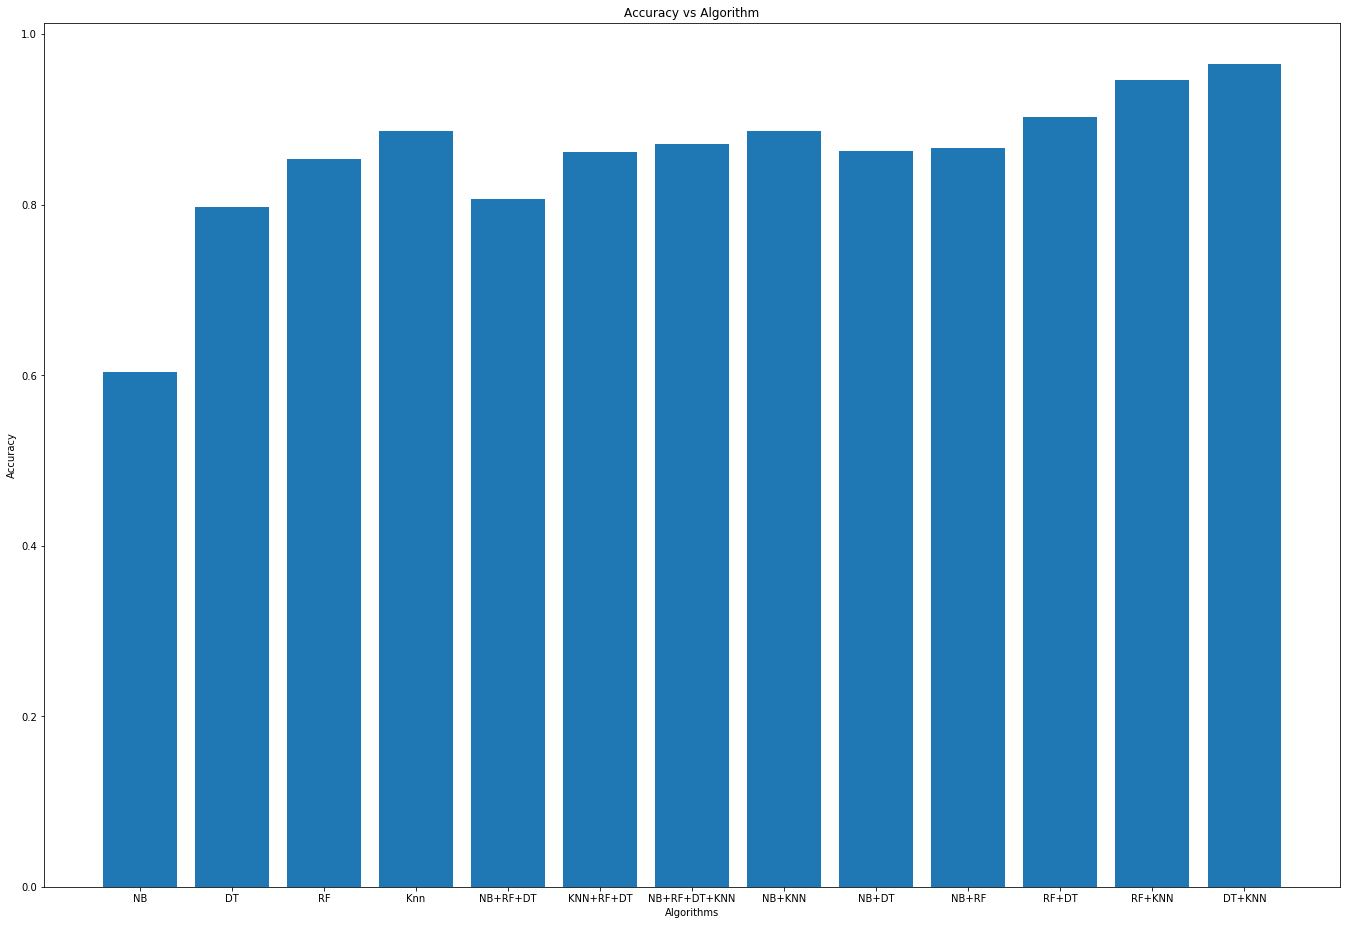

In [31]:
fig = plt.figure()
ax = fig.add_axes([6,6,3,3])
ax.bar(AlgorithmsList,AccuracyList)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Algorithm")
plt.show()

A bar plot depicting accuracies with all the algorithms and combination of algorithms tried out.